In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cleanfootball.csv')


In [5]:
df.head()

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,0.335463,9390,42,5,13,15000000,70000000
1,1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,0.207055,1304,510,58,1,1500000,22000000
2,2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.924658,292,697,84,4,600000,6000000
3,3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,6408,175,22,9,50000000,50000000
4,4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,5031,238,51,21,40000000,80000000


In [7]:

# Initialize an empty list to store the names of categorical columns
categorical_columns = []

# Loop through the DataFrame columns to identify categorical columns
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        categorical_columns.append(col)

# Print the categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: ['team', 'name', 'position']


In [11]:
# One-hot encoding the categorical columns
x = pd.get_dummies(df ,columns=categorical_columns)

In [17]:
# Display the result
print(x)

       Unnamed: 0      height   age  appearance     goals   assists  \
0               0  189.000000  32.0         104  0.000000  0.000000   
1               1  196.000000  30.0          15  0.000000  0.000000   
2               2  188.000000  37.0           4  0.000000  0.000000   
3               3  175.000000  25.0          82  0.028090  0.056180   
4               4  191.000000  30.0          63  0.017889  0.017889   
...           ...         ...   ...         ...       ...       ...   
10741       10749  181.240353  20.0          16  0.175953  0.087977   
10742       10750  190.000000  24.0          26  0.372671  0.186335   
10743       10751  181.240353  19.0          20  0.375000  0.000000   
10744       10752  181.240353  20.0          17  0.312139  0.104046   
10745       10753  170.000000  18.0          21  0.000000  0.000000   

       yellow cards  second yellow cards  red cards  clean sheets  ...  \
0          0.009585                  0.0   0.000000      0.335463  ...   

In [204]:
pca =PCA(n_components=2 ) #Reduce to 2 principal components
X_principal =pca.fit_transform(x)  

In [205]:
# Apply DBSCAN on the PCA-transformed data
db = DBSCAN(eps=10, min_samples=5).fit(X_principal)

# Get the cluster labels
labels = db.labels_

In [206]:
# Calculate the number of clusters and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in lables else 0)
n_noise_ = list(labels).count(-1)

# Print the results
print(f'Total number of points: {total_points}')
print(f'Number of clusters: {n_clusters_}')
print(f'Number of noise points: {n_noise_}')

Total number of points: 10746
Number of clusters: 415
Number of noise points: 2388


/var/folders/p0/2lfpw8h57tg24xr4k0rxsclr0000gn/T/ipykernel_61190/1628450522.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


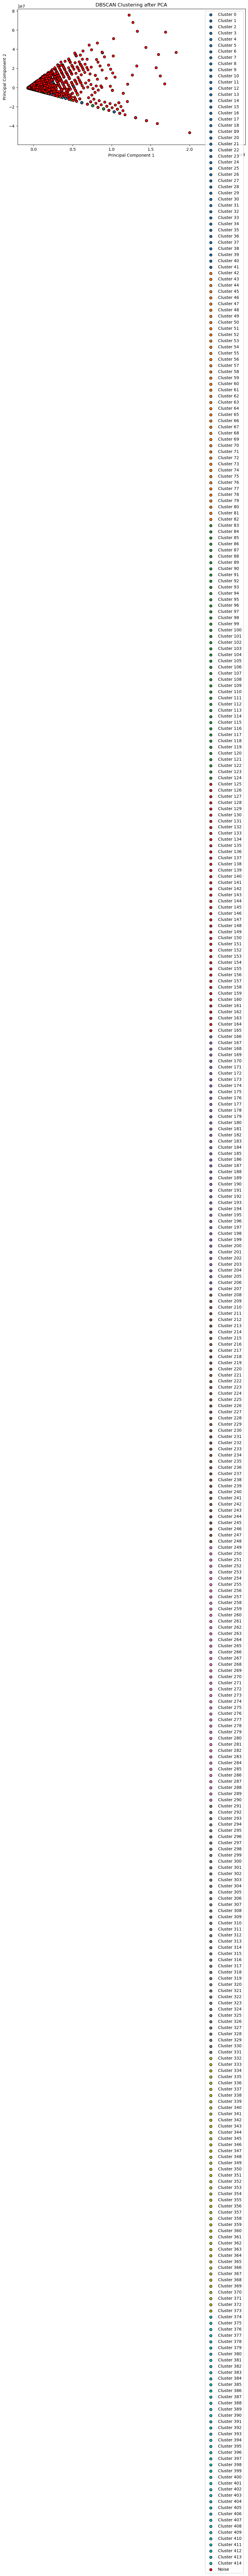

In [207]:
import matplotlib.pyplot as plt

# Define a color map for clusters
unique_labels = set(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))

for label in unique_labels:
    if label == -1:
        # Plot noise points in a distinct color
        plt.scatter(X_principal[labels == label, 0], X_principal[labels == label, 1],
                    color='red', label='Noise', marker='o', edgecolor='k')
    else:
        plt.scatter(X_principal[labels == label, 0], X_principal[labels == label, 1],
                    color=colors(label), label=f'Cluster {label}', marker='o', edgecolor='k')

# Add a legend
plt.legend()

# Label the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after PCA')

# Show the plot
plt.show()
